# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
pip install SQLAlchemy

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


In [4]:
messages.isnull().sum()

id              0
message         0
original    16064
genre           0
dtype: int64

In [5]:
print(messages['genre'].value_counts())

genre
news      13068
direct    10782
social     2398
Name: count, dtype: int64


In [6]:
messages['original'].value_counts()

original
Nap fe ou konnen ke apati de jodi a sevis SMS 4636 pou enfomasyon ijan                                                                                       20
Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi    19
4636 : Nasyonzini di ou men m retire kounye a tout fatra ak gravwa nan#                                                                                       7
Enfomasyon sou tranbleman ta a                                                                                                                                6
hmre vilage kachipul men flood ne bht nuksan kiya he hmra crop,hmre ghr aur hmra rozgar sbkch khtm hogya he mgr govt ne abi tk hmri koi help nhn ki he.       6
                                                                                                                                                             ..
Ki kote yap bay dlo, manje nan 

**OBSERVATION 1** Original column seems to be a message in an original language, while message is a translation to English.

**OBSERVATION 2** There are 3 types of genres (seems to be a source of messages): news, direct, social

**OBSERVARION 3** Original column has many null values, we assume that those messages are in English and do not have other than English language text to be filled in that column.

In [7]:
# A function to create a historgram
def plot_histogram(df, column):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
    
    # Count the occurrences of each value in the specified column
    value_counts = df[column].value_counts()
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, color='blue')  # Using color instead of palette
    
    # Adding titles and labels
    plt.title(f'Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

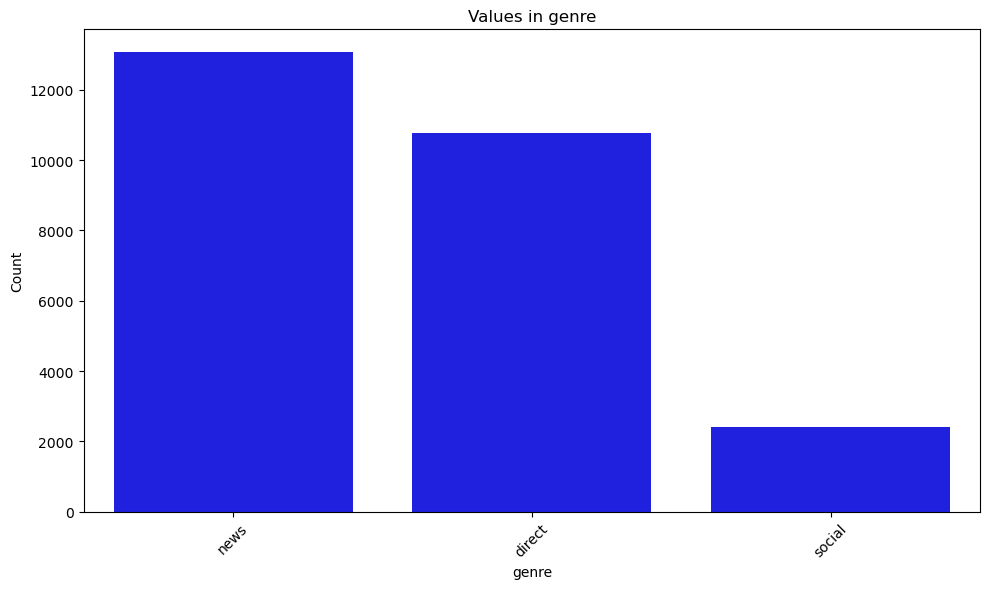

In [9]:
plot_histogram(messages, 'genre')

In [8]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [9]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  int64 
 1   categories  26248 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.3+ KB


In [10]:
categories.tail()

,id,categories
26243,30261,related-0;request-0;offer-0;aid_related-0;medi...
26244,30262,related-0;request-0;offer-0;aid_related-0;medi...
26245,30263,related-1;request-0;offer-0;aid_related-0;medi...
26246,30264,related-1;request-0;offer-0;aid_related-1;medi...
26247,30265,related-1;request-0;offer-0;aid_related-0;medi...


In [11]:
categories.isnull().sum()

id            0
categories    0
dtype: int64

**OBSERVATION 4** Categories dataset has two columns: id and categories. Categories column can be split into various separate columns, each for different categories of a message, including related, request, offer etc.

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [12]:
# merge datasets
df = pd.merge(messages, categories, on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [13]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(';', expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [14]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x[:-2]).tolist()
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [15]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [16]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype(str).str[-1]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [17]:
# drop the original categories column from `df`
df = df.drop('categories', axis=1)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [18]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26386 non-null  int64 
 1   message                 26386 non-null  object
 2   original                10246 non-null  object
 3   genre                   26386 non-null  object
 4   related                 26386 non-null  int32 
 5   request                 26386 non-null  int32 
 6   offer                   26386 non-null  int32 
 7   aid_related             26386 non-null  int32 
 8   medical_help            26386 non-null  int32 
 9   medical_products        26386 non-null  int32 
 10  search_and_rescue       26386 non-null  int32 
 11  security                26386 non-null  int32 
 12  military                26386 non-null  int32 
 13  child_alone             26386 non-null  int32 
 14  water                   26386 non-null  int32 
 15  fo

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [20]:
# check number of duplicates
print(df.duplicated().sum())

170


In [21]:
df.nunique()

id                        26180
message                   26177
original                   9630
genre                         3
related                       3
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
child_alone                   1
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_in

In [22]:
df['related'].value_counts()

related
1    20042
0     6140
2      204
Name: count, dtype: int64

In [23]:
print(df[df['related'] == 2])

          id                                            message  \
117      146  Dans la zone de Saint Etienne la route de Jacm...   
221      263  . .. i with limited means. Certain patients co...   
307      373  The internet caf Net@le that's by the Dal road...   
462      565  Bonsoir, on est a bon repos aprs la compagnie ...   
578      700  URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX ...   
...      ...                                                ...   
20465  23662       transferred to a sanitary landfill site by a   
20636  23861  Families also have solar lamps which can be re...   
22481  25874  Read the [full blog post](http://www.odi.org.u...   
23537  27071  Actualmente e independientemente de la ayuda d...   
25385  29126  Mali's former President Amadou Toumani Touré -...   

                                                original   genre  related  \
117    Nan zon st. etine rout jakmel la bloke se mize...  direct        2   
221    t avec des moyens limites. Certain

In [24]:
print(df[df.duplicated(keep=False)])

          id                                            message  \
162      202  ?? port au prince ?? and food. they need gover...   
163      202  ?? port au prince ?? and food. they need gover...   
164      202  ?? port au prince ?? and food. they need gover...   
165      202  ?? port au prince ?? and food. they need gover...   
657      804  elle est vraiment malade et a besoin d'aide. u...   
...      ...                                                ...   
25292  29022  In a field in Jallouzai, just inside Pakistan,...   
25377  29119  Most victims (90 per cent) show little or no s...   
25378  29119  Most victims (90 per cent) show little or no s...   
25379  29119  Most victims (90 per cent) show little or no s...   
25380  29119  Most victims (90 per cent) show little or no s...   

                                                original   genre  related  \
162    p bay pap la syen ak manje. Yo bezwen ed gouve...  direct        1   
163    p bay pap la syen ak manje. Yo bez

In [25]:
# drop duplicates
df=df.drop_duplicates()

In [26]:
# check number of duplicates
print(df.duplicated().sum())

0


In [27]:
df['related'].value_counts()

related
1    19906
0     6122
2      188
Name: count, dtype: int64

**OBSERVATION 5** There are unusual value of 2 in related column, other category columns have values of either 0 or 1. To be reviewed later for the nature of those rows.

### 6B. Remove entries where related=2, as it's a binary column

In [32]:
# # Remove rows where the 'related' column is equal to 2
df = df[df['related'] != 2]

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [33]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('Message', engine, index=False, if_exists='replace') 

26028

### 8. Use this notebook to complete `process_data.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `process_data.py` in the classroom on the `Project Workspace IDE` coming later.

### process_data.py has been created and the resulting DisasterResponse.db

### 9. Below we would like to compare both DB: created as a result of process_data.py and the one shared in Udacity

In [34]:
# Connect to the SQLite database
conn = sqlite3.connect('DisasterResponse_original.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a query to get the names of all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Close the connection
conn.close()

# Print the table names
for table in tables:
    print(table[0])

Message


In [35]:
engine_original = create_engine('sqlite:///DisasterResponse_original.db')

# Load the data into a DataFrame
df_original = pd.read_sql_table('Message', engine_original)

In [36]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26216 entries, 0 to 26215
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   26216 non-null  int64 
 1   id                      26216 non-null  int64 
 2   message                 26216 non-null  object
 3   original                10170 non-null  object
 4   genre                   26216 non-null  object
 5   related                 26216 non-null  int64 
 6   request                 26216 non-null  int64 
 7   offer                   26216 non-null  int64 
 8   aid_related             26216 non-null  int64 
 9   medical_help            26216 non-null  int64 
 10  medical_products        26216 non-null  int64 
 11  search_and_rescue       26216 non-null  int64 
 12  security                26216 non-null  int64 
 13  military                26216 non-null  int64 
 14  child_alone             26216 non-null  int64 
 15  wa

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26028 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26028 non-null  int64 
 1   message                 26028 non-null  object
 2   original                10038 non-null  object
 3   genre                   26028 non-null  object
 4   related                 26028 non-null  int32 
 5   request                 26028 non-null  int32 
 6   offer                   26028 non-null  int32 
 7   aid_related             26028 non-null  int32 
 8   medical_help            26028 non-null  int32 
 9   medical_products        26028 non-null  int32 
 10  search_and_rescue       26028 non-null  int32 
 11  security                26028 non-null  int32 
 12  military                26028 non-null  int32 
 13  child_alone             26028 non-null  int32 
 14  water                   26028 non-null  int32 
 15  food   

**OBSERVATION 6** We need to reset our index and add index column to the resulting df in process_data.py

In [38]:
engine_new = create_engine('sqlite:///DisasterResponse.db')

# Load the data into a DataFrame
df_new = pd.read_sql_table('Message', engine_new)

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26028 entries, 0 to 26027
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26028 non-null  int64 
 1   message                 26028 non-null  object
 2   original                10038 non-null  object
 3   genre                   26028 non-null  object
 4   related                 26028 non-null  int64 
 5   request                 26028 non-null  int64 
 6   offer                   26028 non-null  int64 
 7   aid_related             26028 non-null  int64 
 8   medical_help            26028 non-null  int64 
 9   medical_products        26028 non-null  int64 
 10  search_and_rescue       26028 non-null  int64 
 11  security                26028 non-null  int64 
 12  military                26028 non-null  int64 
 13  child_alone             26028 non-null  int64 
 14  water                   26028 non-null  int64 
 15  fo